## Pulling on polymers

As building blocks of the cytoskeleton, the properties of polymers under force are clearly relevant. In addition, the reponse of polymers to force is a very powerful way to probe their properties. 

Scientists have developed a number of ways to pull on individual polymers (for example RNA and DNA) and measure how exactly the polymer responds. 

![image.png](figures/optical_trap.png)

Illustration of optical tweezers by [Joe Redish](http://umdberg.pbworks.com/w/page/47555271/DNA%20spring%201%3A%20Spring%20constant%20of%20DNA). For a small explainer on how optical tweezers work, have a look at this video [youtu.be/UAmdoOX3870](https://www.youtube.com/watch?v=UAmdoOX3870).
The 2018 Nobel prize was awarded to some of the inventors of optical tweezers!

### DNA force-extension curves
One of the properties of a polymer that one can measure with optical tweezers (or related techniques) are force extension curves:

![image.png](figures/DNA_extension_curve.png)

The left graph is from [Bustamante et al](https://science.sciencemag.org/content/265/5178/1599) and measure the extension in response to forces of one pico-Newton and below. The right graph in from [van Mameren et al](https://www.pnas.org/content/106/43/18231) shows the response of DNA at much high forces aroun 100pN. 

With increasing force, the following things happen:
 * the end-to-end distance is small compared to the contour length -- the DNA is still a coil.
 * the DNA starts to stretch -- the end-to-end distance approaches to the contour length
 * the DNA starts to transition into other configurations and unravels

### Entropic springs

We will mainly discuss the low force behavior here where the force is barely enough to distort the random coil configuration. For simplicity, we will consider the freely jointed chain and assume we are applying a force along the $x$-axis:
![image.png](figures/entropic_spring.png)

The total energy of the configuration is $E = F R_x$ where $R_x$ is the $x$-component of the end-to-end distance. Each segments contributes a little bit to $R_x$ and this contribution $\chi$ is Boltzmann distributed with a probability proportional to:
$$
p(\chi|F) \sim e^{F\chi/kT}
$$

The probability density of $\chi$ needs to be normalized, that as $\int_{-d}^{d} p(\chi|F) d\chi = 1$, which leads to:

$$
p(\chi|F) = \frac{F}{kT}\frac{e^{F\chi/kT}}{e^{Fd/kT}-e^{-Fd/kT}}
$$

Note also that this probability density has units of 1/length as it should.

With the probability density at hand, we can now calculate the average extension of the polymer as a function of the force $F$: 
$$
\begin{split}
\langle R_x \rangle_{F} = N\langle \chi \rangle_{F} = N\int_{-d}^d\; \chi p(\chi|F) d\chi  = dN \left(\frac{e^{Fd/kT}+e^{-Fd/kT}}{e^{Fd/kT}-e^{-Fd/kT}} - \frac{kT}{Fd}\right)
\end{split}
$$

And here the full derivation as a reference:
$$
\begin{split}
\langle R_x \rangle_{F} &= N\int_{-d}^d\; \chi p(\chi|F) d\chi  = \frac{FN}{kT(e^{Fd/kT}-e^{-Fd/kT})} \int_{-d}^{d} \;\chi e^{F\chi/kT}  d\chi\\
 &= \frac{FN}{kT(e^{Fd/kT}-e^{-Fd/kT})} \int_{-d}^{d} \; kT \frac{\partial }{\partial F} e^{F\chi/kT} d\chi \\
 &= \frac{FN}{e^{Fd/kT}-e^{-Fd/kT}} \frac{\partial }{\partial F}\frac{kT}{F} \left(e^{Fd/kT} - e^{-Fd/kT}\right) \\
 & = \frac{FN}{e^{Fd/kT}-e^{-Fd/kT}} \left(-\frac{kT}{F^2} + d\left(e^{Fd/kT} + e^{-Fd/kT}\right)\right)\\
& = dN \left(\frac{e^{Fd/kT}+e^{-Fd/kT}}{e^{Fd/kT}-e^{-Fd/kT}} - \frac{kT}{Fd}\right)
\end{split}
$$

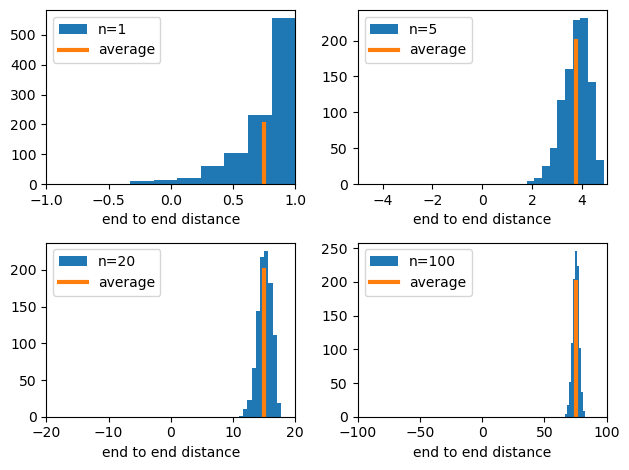

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncexpon

def drawChi(d, FoKT, size=(1,1)):
    return -truncexpon.rvs(2*d*FoKT, size=size)/FoKT + d

def average_extension(d, FoKT):
    FdoKT = d*FoKT
    return (np.exp(FdoKT)+np.exp(-FdoKT))/(np.exp(FdoKT)-np.exp(-FdoKT)) - 1/FdoKT

# F/kT is an inverse length which is meaningful relative to d
d = 1
FoKT = 4.0
fig, axs = plt.subplots(2,2)
for ni, n in enumerate([1,5,20,100]):
    polymers = drawChi(d,FoKT, size = (n,1000))
    end_to_end_distance = polymers.sum(axis=0)
    axs[ni//2, ni%2].hist(end_to_end_distance, label=f'n={n}')
    axs[ni//2, ni%2].plot([n*d*average_extension(d, FoKT), n*d*average_extension(d, FoKT)], [1,200], lw=3,label='average')
    axs[ni//2, ni%2].legend()
    axs[ni//2, ni%2].set_xlabel('end to end distance')
    axs[ni//2, ni%2].set_xlim(-n,n)
plt.tight_layout()


A spring has the property that the force $F$ it exerts increases linearly with the extension $x$:
$$
F = \alpha x
$$
The coefficient $\alpha$ here is the spring constant. 

Going back to the force extension relation above, we can show that for small forces the extension is linear in the force (and vice versa):

$$
\langle R_x \rangle_{F} \approx F\frac{Nd^2}{3kT} \quad \frac{Fd}{kT}\ll 1
$$

which corresponds to an __entropic spring constant__ $\alpha = \frac{3kT}{Nd^2}$. 

Let's have a quick look at this numerically:

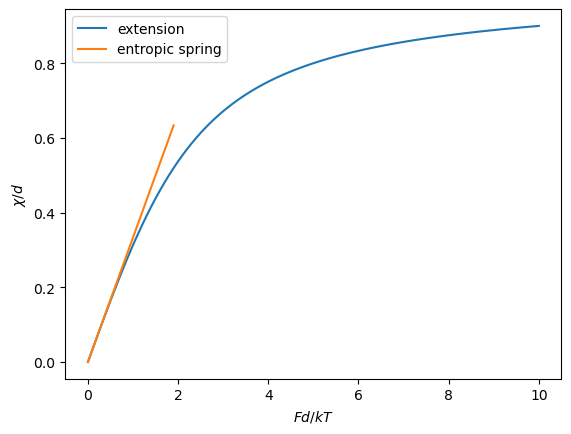

In [2]:
FoKT = np.linspace(0.001,10,101)
d=1

plt.plot(d*FoKT, average_extension(d, FoKT), label='extension')
plt.plot(d*FoKT[:20], d*FoKT[:20]/3, label='entropic spring')
plt.xlabel(r'$Fd/kT$')
plt.ylabel(r'$\chi/d$')
plt.legend()

#### What is an entropic spring?
 * the freely jointed model has **no** stiffness!
 * yet, it resists stretching!
 * this force is of entropic nature: There are fewer stretched configurations than globular configurations -> entropic force
 * long polymers are soft
 * the shorter the segments, the stronger the spring!
 * the higher the temperature, the stronger the spring!

The latter is a well known effect in rubber: A stretched rubber band contracts if you heat it because its entropic springs get stronger!
see here: https://www.youtube.com/watch?v=eB4B2xZI77A

#### Limitations

The dashed line in the force extension curve of dsDNA above is the prediction by the freely jointed chain model. 
You'll notice that is is off at higher forces. This is due to the fact that dsDNA is better described by a WLC model than a freely jointed chain model. The paper from which I took this figure works out the details of force extension curves of the WLC. 

### Dig deeper
 * Verify the normalization of $p(\chi|f)$.
 * Calculate the expectation value of $\chi$ over $p(\chi|f)$.
 * Calculate the entropic spring constant.
 * read up on rubber elasticity: https://en.wikipedia.org/wiki/Rubber_elasticity
